In [19]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer


In [22]:
product_info_file_path = '/Users/iramkamdar/Desktop/SKINCARE_MODEL/product_info.csv'
data = pd.read_csv(product_info_file_path)

product_info_df = data.copy()
product_info_df.drop(['size', 'variation_type', 'variation_value','variation_desc', 'value_price_usd', 'sale_price_usd', 'limited_edition', 'new', 'online_only', 'out_of_stock', 'sephora_exclusive', 'child_count','child_max_price', 'child_min_price'], axis=1, inplace=True)
product_info_df.rename(columns={'rating': 'overall_rating'}, inplace=True)




In [23]:
product_info_df.columns.tolist()

['product_id',
 'product_name',
 'brand_id',
 'brand_name',
 'loves_count',
 'overall_rating',
 'reviews',
 'ingredients',
 'price_usd',
 'highlights',
 'primary_category',
 'secondary_category',
 'tertiary_category']

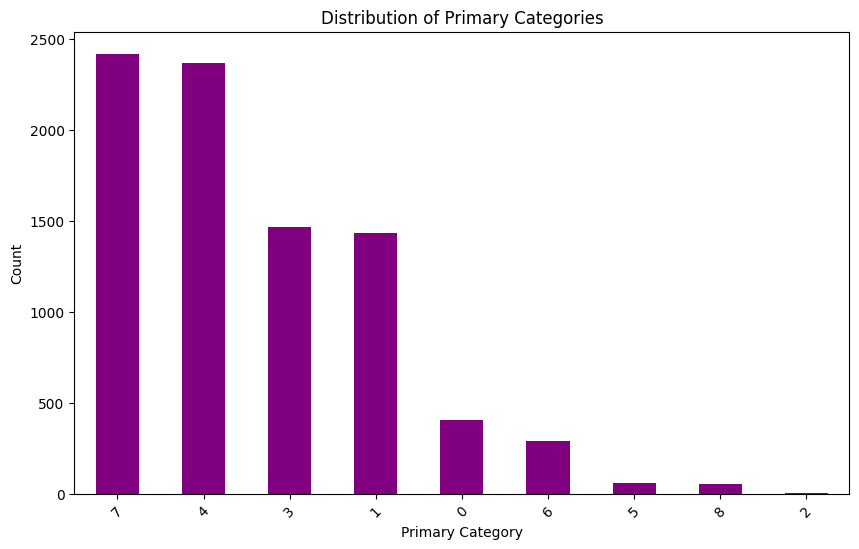

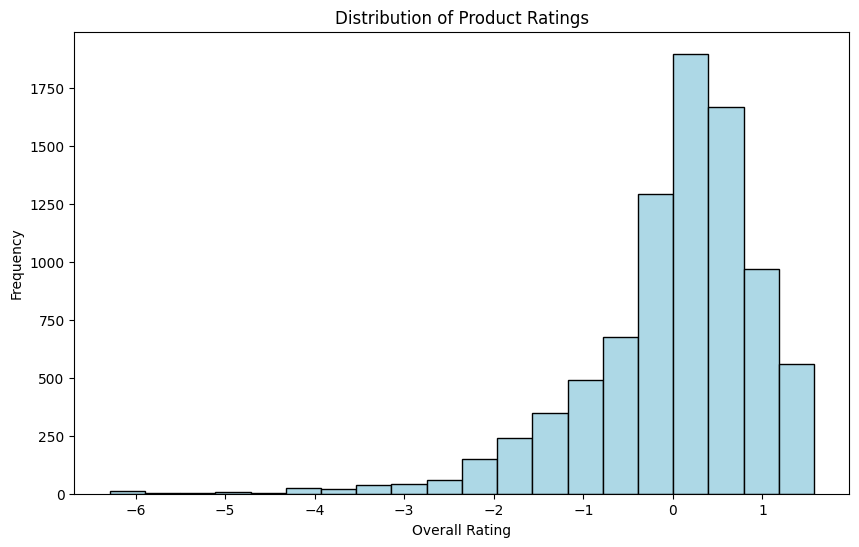

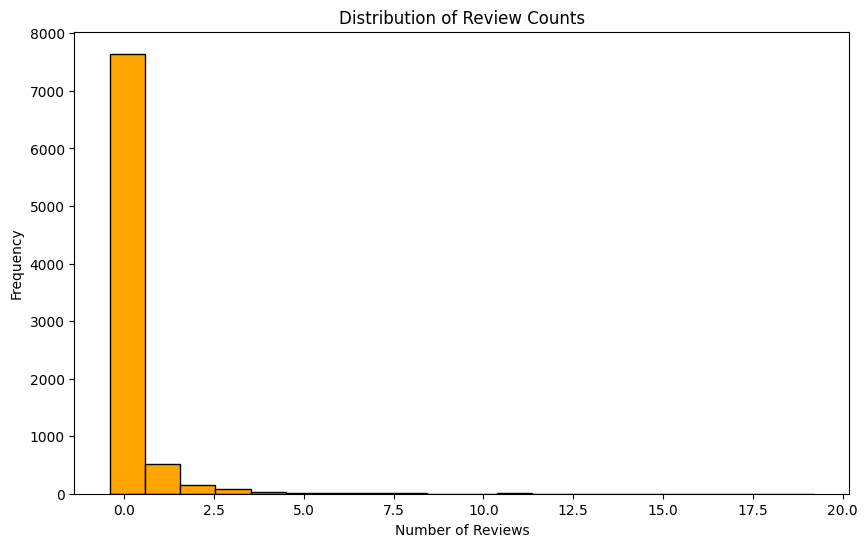

<Figure size 1200x600 with 0 Axes>

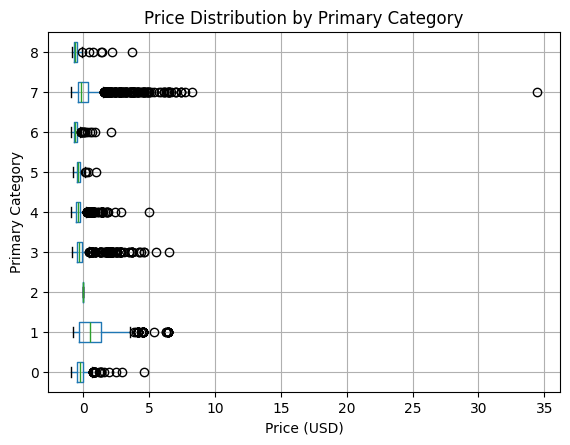

In [24]:


# Proceed with handling missing values, encoding, and standardization

# Handling missing values
numerical_cols = ['overall_rating', 'reviews', 'price_usd']
num_imputer = SimpleImputer(strategy='median')
product_info_df[numerical_cols] = num_imputer.fit_transform(product_info_df[numerical_cols])

categorical_cols = ['primary_category', 'secondary_category', 'tertiary_category']
cat_imputer = SimpleImputer(strategy='most_frequent')
product_info_df[categorical_cols] = cat_imputer.fit_transform(product_info_df[categorical_cols])

# Encoding specific categorical columns with Label Encoding
label_encoder_cols = ['brand_name', 'primary_category', 'secondary_category', 'tertiary_category']
label_encoders = {col: LabelEncoder() for col in label_encoder_cols}
for col in label_encoder_cols:
    product_info_df[col] = label_encoders[col].fit_transform(product_info_df[col].astype(str))

# Standardizing numerical features
scaler = StandardScaler()
product_info_df[numerical_cols] = scaler.fit_transform(product_info_df[numerical_cols])

# Text Processing: TF-IDF Vectorization for 'highlights' and 'ingredients'
product_info_df['highlights'] = product_info_df['highlights'].fillna('')
product_info_df['ingredients'] = product_info_df['ingredients'].fillna('')
tfidf_highlights = TfidfVectorizer(max_features=50, stop_words='english')
tfidf_ingredients = TfidfVectorizer(max_features=50, stop_words='english')

# Fit and transform for each column
highlights_tfidf_matrix = tfidf_highlights.fit_transform(product_info_df['highlights'])
ingredients_tfidf_matrix = tfidf_ingredients.fit_transform(product_info_df['ingredients'])

# Convert TF-IDF matrices to DataFrames
highlights_df = pd.DataFrame(highlights_tfidf_matrix.toarray(), columns=tfidf_highlights.get_feature_names_out())
ingredients_df = pd.DataFrame(ingredients_tfidf_matrix.toarray(), columns=tfidf_ingredients.get_feature_names_out())

# Merge TF-IDF features into processed data
product_info_df.drop(['highlights', 'ingredients'], axis=1, inplace=True)
processed_data = pd.concat([product_info_df.reset_index(drop=True), highlights_df, ingredients_df], axis=1)

# Proceed with the visualization as initially planned
# 1. Bar chart for primary category distribution
plt.figure(figsize=(10, 6))
processed_data['primary_category'].value_counts().plot(kind='bar', color='purple')
plt.title('Distribution of Primary Categories')
plt.xlabel('Primary Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 2. Histogram for distribution of processed ratings (now labeled as 'overall_rating')
plt.figure(figsize=(10, 6))
processed_data['overall_rating'].plot(kind='hist', bins=20, edgecolor='black', color='lightblue')
plt.title('Distribution of Product Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.show()

# 3. Histogram for distribution of review counts
plt.figure(figsize=(10, 6))
processed_data['reviews'].plot(kind='hist', bins=20, edgecolor='black', color='orange')
plt.title('Distribution of Review Counts')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()

# 4. Box plot for price distribution by primary category
plt.figure(figsize=(12, 6))
processed_data.boxplot(column='price_usd', by='primary_category', vert=False)
plt.title('Price Distribution by Primary Category')
plt.xlabel('Price (USD)')
plt.ylabel('Primary Category')
plt.suptitle("")  # Suppress automatic title from boxplot
plt.show()


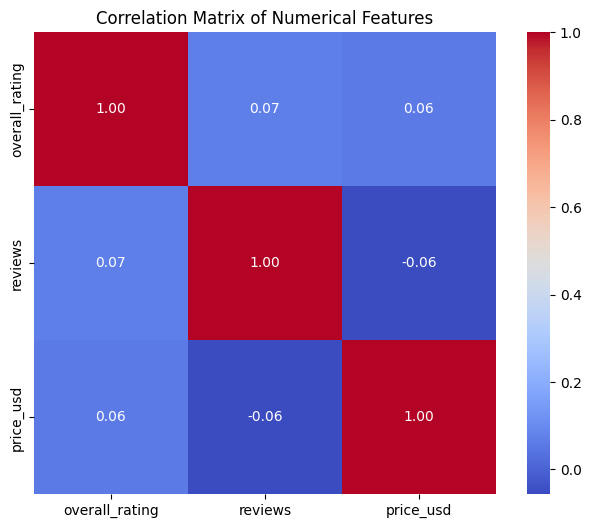

In [27]:
import seaborn as sns

# Selecting numerical columns for correlation analysis
numerical_data = processed_data[['overall_rating', 'reviews', 'price_usd']]

# Calculating the correlation matrix
correlation_matrix = numerical_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

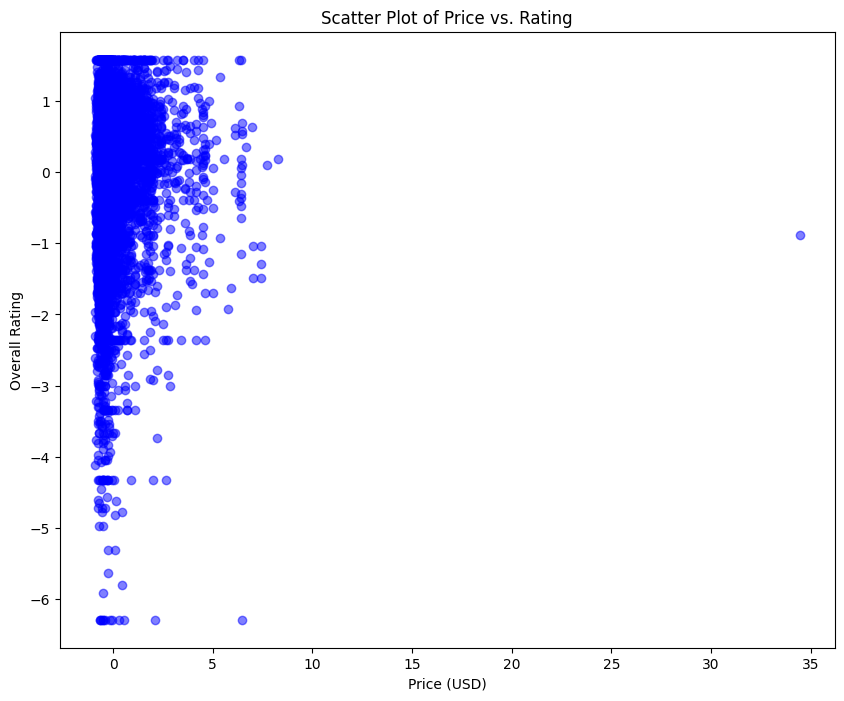

In [28]:
# Creating a scatter plot for `price_usd` vs. `overall_rating` to explore their relationship



plt.figure(figsize=(10, 8))
plt.scatter(processed_data['price_usd'], processed_data['overall_rating'], alpha=0.5, color='blue')
plt.title("Scatter Plot of Price vs. Rating")
plt.xlabel("Price (USD)")
plt.ylabel("Overall Rating")
plt.show()


In [2]:
import matplotlib.pyplot as plt

# Re-plotting the histogram using the original, unscaled ratings
# Assuming 'rating' column in processed_data represents the original rating values

plt.figure(figsize=(10, 6))
plt.hist(product_info_df['rating'], bins=30, edgecolor='black', color='skyblue')
plt.title("Distribution of Original Product Ratings")
plt.xlabel("Product Rating")
plt.ylabel("Frequency")
plt.show()


NameError: name 'product_info_df' is not defined

<Figure size 1000x600 with 0 Axes>